In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
plot_dir = "../../results/plots/"

In [3]:
V = pd.read_parquet("../../results/add_preds/results/gnomad/all/defined/128/multiz100way/89/128/64/True/defined.phastCons.percentile-75_0.05_0.001/medium/0.1/42/30000/True/True/True.parquet")
V

,chrom,pos,ref,alt,AC,AN,AF,consequence,GPN-MSA
0,1,10181,A,T,56,520,0.107692,"TF_binding_site_variant,downstream_gene_varian...",-0.369250
1,1,10193,A,T,1,25386,0.000039,"downstream_gene_variant,regulatory_region_vari...",-0.429617
2,1,10202,C,G,1,71460,0.000014,"downstream_gene_variant,regulatory_region_vari...",-2.825330
3,1,10367,C,T,33,133014,0.000248,"TF_binding_site_variant,downstream_gene_varian...",-0.602358
4,1,10376,A,C,1,49706,0.000020,"TF_binding_site_variant,downstream_gene_varian...",0.382358
...,...,...,...,...,...,...,...,...,...
531728688,Y,56887631,C,T,80,23830,0.003357,intergenic_variant,0.544374
531728689,Y,56887645,C,A,1,22544,0.000044,intergenic_variant,0.460544
531728690,Y,56887664,G,A,2,21166,0.000094,intergenic_variant,0.204933
531728691,Y,56887696,G,T,1,18631,0.000054,intergenic_variant,0.024746


In [4]:
V['MAF'] = V['AF'].where(V['AF'] <= 0.5, 1 - V['AF'])
V

,chrom,pos,ref,alt,AC,AN,AF,consequence,GPN-MSA,MAF
0,1,10181,A,T,56,520,0.107692,"TF_binding_site_variant,downstream_gene_varian...",-0.369250,0.107692
1,1,10193,A,T,1,25386,0.000039,"downstream_gene_variant,regulatory_region_vari...",-0.429617,0.000039
2,1,10202,C,G,1,71460,0.000014,"downstream_gene_variant,regulatory_region_vari...",-2.825330,0.000014
3,1,10367,C,T,33,133014,0.000248,"TF_binding_site_variant,downstream_gene_varian...",-0.602358,0.000248
4,1,10376,A,C,1,49706,0.000020,"TF_binding_site_variant,downstream_gene_varian...",0.382358,0.000020
...,...,...,...,...,...,...,...,...,...,...
531728688,Y,56887631,C,T,80,23830,0.003357,intergenic_variant,0.544374,0.003357
531728689,Y,56887645,C,A,1,22544,0.000044,intergenic_variant,0.460544,0.000044
531728690,Y,56887664,G,A,2,21166,0.000094,intergenic_variant,0.204933,0.000094
531728691,Y,56887696,G,T,1,18631,0.000054,intergenic_variant,0.024746,0.000054


In [5]:
V.loc[V.AF > 0.5, "GPN-MSA"] *= -1
V

,chrom,pos,ref,alt,AC,AN,AF,consequence,GPN-MSA,MAF
0,1,10181,A,T,56,520,0.107692,"TF_binding_site_variant,downstream_gene_varian...",-0.369250,0.107692
1,1,10193,A,T,1,25386,0.000039,"downstream_gene_variant,regulatory_region_vari...",-0.429617,0.000039
2,1,10202,C,G,1,71460,0.000014,"downstream_gene_variant,regulatory_region_vari...",-2.825330,0.000014
3,1,10367,C,T,33,133014,0.000248,"TF_binding_site_variant,downstream_gene_varian...",-0.602358,0.000248
4,1,10376,A,C,1,49706,0.000020,"TF_binding_site_variant,downstream_gene_varian...",0.382358,0.000020
...,...,...,...,...,...,...,...,...,...,...
531728688,Y,56887631,C,T,80,23830,0.003357,intergenic_variant,0.544374,0.003357
531728689,Y,56887645,C,A,1,22544,0.000044,intergenic_variant,0.460544,0.000044
531728690,Y,56887664,G,A,2,21166,0.000094,intergenic_variant,0.204933,0.000094
531728691,Y,56887696,G,T,1,18631,0.000054,intergenic_variant,0.024746,0.000054


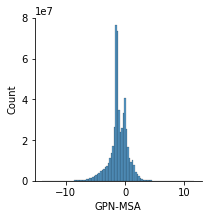

In [11]:
plt.figure(figsize=(3,3))
sns.histplot(data=V, x="GPN-MSA", bins=100)
sns.despine()
plt.savefig(plot_dir + "gnomad_full_hist.svg", bbox_inches="tight")

In [21]:
#bins = np.arange(-10.5, 6.5)

bins = np.arange(-15.5, 12.5)

V["bin"] = pd.cut(V["GPN-MSA"], bins)
V["bin_midpoint"] = V.bin.apply(lambda x: x.mid)
V

,chrom,pos,ref,alt,AC,AN,AF,consequence,GPN-MSA,MAF,bin,bin_midpoint
0,1,10181,A,T,56,520,0.107692,"TF_binding_site_variant,downstream_gene_varian...",-0.369250,0.107692,"(-0.5, 0.5]",0.0
1,1,10193,A,T,1,25386,0.000039,"downstream_gene_variant,regulatory_region_vari...",-0.429617,0.000039,"(-0.5, 0.5]",0.0
2,1,10202,C,G,1,71460,0.000014,"downstream_gene_variant,regulatory_region_vari...",-2.825330,0.000014,"(-3.5, -2.5]",-3.0
3,1,10367,C,T,33,133014,0.000248,"TF_binding_site_variant,downstream_gene_varian...",-0.602358,0.000248,"(-1.5, -0.5]",-1.0
4,1,10376,A,C,1,49706,0.000020,"TF_binding_site_variant,downstream_gene_varian...",0.382358,0.000020,"(-0.5, 0.5]",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
531728688,Y,56887631,C,T,80,23830,0.003357,intergenic_variant,0.544374,0.003357,"(0.5, 1.5]",1.0
531728689,Y,56887645,C,A,1,22544,0.000044,intergenic_variant,0.460544,0.000044,"(-0.5, 0.5]",0.0
531728690,Y,56887664,G,A,2,21166,0.000094,intergenic_variant,0.204933,0.000094,"(-0.5, 0.5]",0.0
531728691,Y,56887696,G,T,1,18631,0.000054,intergenic_variant,0.024746,0.000054,"(-0.5, 0.5]",0.0


In [26]:
V.bin.notna().sum()

531728690

In [22]:
#df = V.groupby("bin_midpoint").MAF.mean().to_frame().reset_index()
df = V.groupby("bin_midpoint").agg({"MAF": ["mean", "count"]}).reset_index()
df.columns = df.columns.map(lambda x: '-'.join(x))
df

/tmp/ipykernel_3634599/894893309.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = V.groupby("bin_midpoint").agg({"MAF": ["mean", "count"]}).reset_index()


,bin_midpoint-,MAF-mean,MAF-count
0,-15.0,NaN,0
1,-14.0,0.000012,93
2,-13.0,0.000049,12404
3,-12.0,0.000041,69527
4,-11.0,0.000090,169627
5,-10.0,0.000149,293185
6,-9.0,0.000238,482824
7,-8.0,0.000440,847817
8,-7.0,0.000792,1716936
9,-6.0,0.001177,4185962


/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


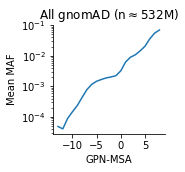

In [39]:
plt.figure(figsize=(2,2))
g = sns.lineplot(
    data=df[df["MAF-count"] >= 1000],
    x="bin_midpoint-",
    y="MAF-mean",
    errorbar=None,
)
plt.xlabel("GPN-MSA")
plt.ylabel("Mean MAF")
title = r"All gnomAD (n$\approx$532M)"
plt.title(title)
sns.despine();
g.set(yscale='log');
plt.xticks([-10, -5, 0, 5])
plt.savefig(plot_dir + "gnomad_full_score_vs_maf.svg", bbox_inches="tight")